In [54]:
import numpy as np
import sympy as sp
from utils.plotUtils import fixPhaseJumps

bw_v = 30
w0_v = 0
k = int(16)

w0, bw = sp.symbols('w0 bw', real=True, positive=True)
s = sp.symbols('s', real=True)
num = bw**k + w0**k
den = (s+w0)**k + bw**k
# create a polynomial, get coeffs, simplify, replace w0 and bw and get coeffs again with new values
n_poly = sp.Poly(num, s)
d_poly = sp.Poly(den, s)
d_coeffs = d_poly.all_coeffs()
n_coeffs = n_poly.all_coeffs()

print('d_coeffs = ', d_coeffs)
for i in range(0, len(d_coeffs)):
    d_coeffs[i] = sp.simplify(sp.simplify(d_coeffs[i]).subs({w0: w0_v, bw: bw_v}))
for i in range(0, len(n_coeffs)):
    n_coeffs[i] = sp.simplify(sp.simplify(n_coeffs[i]).subs({w0: w0_v, bw: bw_v}))

num = n_coeffs
den = d_coeffs
print('num = ', n_coeffs)
print('den = ', d_coeffs)

print( type(num), type(den) )
print( type(num[0]), type(den[0]) )
# convert to float values
num = np.array(num).astype(np.float64)

d_coeffs =  [1, 16*w0, 120*w0**2, 560*w0**3, 1820*w0**4, 4368*w0**5, 8008*w0**6, 11440*w0**7, 12870*w0**8, 11440*w0**9, 8008*w0**10, 4368*w0**11, 1820*w0**12, 560*w0**13, 120*w0**14, 16*w0**15, bw**16 + w0**16]
num =  [430467210000000000000000]
den =  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 430467210000000000000000]
<class 'list'> <class 'list'>
<class 'sympy.core.numbers.Integer'> <class 'sympy.core.numbers.One'>


H =  4.3046721e+23/(W**16 + 430467210000000000000000)


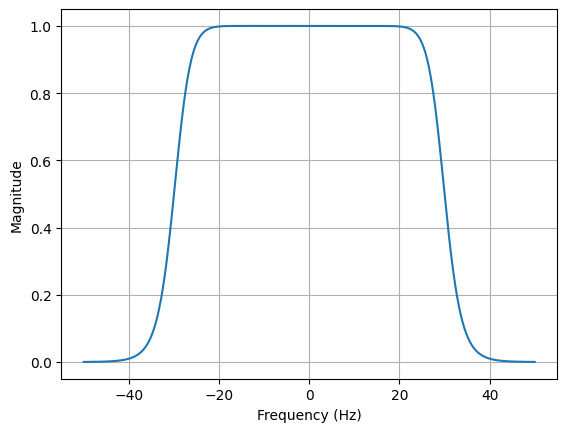

In [55]:
import matplotlib.pyplot as plt
# Create a transfer function with the coefficients using sympy poly

W = sp.symbols('W', real=True)
H = sp.Poly(num, s).subs(s, sp.I*W)/sp.Poly(den, s).subs(s, sp.I*W)

print('H = ', H)
evalH = sp.lambdify(W, H, 'numpy')

# evalH = sp.lambdify(s, H, 'numpy')
# w = np.logspace(-1, 3, 1000)
w = np.linspace(-50, 50, 1000)
mag = np.abs(evalH(w))
# phase = fixPhaseJumps(np.angle(evalH(w), deg=True))

# plt.semilogx(w, mag)
plt.plot(w, mag)
# plt.plot(w, phase/(180.0))
plt.grid(True)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()